<a href="https://colab.research.google.com/github/nxxk23/AI-Engineer/blob/main/Resume_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **convert pdf to img**

In [4]:
!nvidia-smi #using GPU is more faster

Fri Aug 30 03:48:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install ghostscript
!pip install opencv-python easyocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9
  libgs9-common libidn12 libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 10 newly installed, 0 to remove and 49 not upgraded.
Need to get 16.7 MB of archives.
After this operation, 63.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-droid-fallback all 1:6.0.1r16-1.1build1 [1,805 kB]


In [7]:
!pwd

/content


In [9]:
pdf_path = "/content/drive/MyDrive/AIEngineer/resume/Resume ba2.pdf"

In [10]:
!mkdir -p /content/resume/images/
!gs -dBATCH -dNOPAUSE -sDEVICE=pngalpha -r300 -sOutputFile="/content/resume/images/page_%d.png" "{pdf_path}"

GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


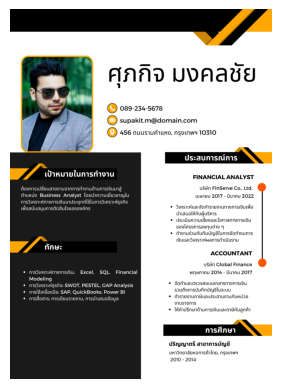

In [11]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("/content/resume/images/page_1.png")

# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()


In [12]:
import easyocr

# Create an EasyOCR Reader
reader = easyocr.Reader(['th', 'en'])

# Perform OCR on an image
result = reader.readtext('/content/resume/images/page_1.png')

# Print the results
for detection in result:
    print(detection)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

([[905, 496], [2344, 496], [2344, 763], [905, 763]], ' ศุภกิจฺ มงคลชัย', 0.5152074046732871)
([[1033, 910], [1452, 910], [1452, 975], [1033, 975]], '089-234-5678', 0.9984851042906709)
([[1031, 1012], [1781, 1012], [1781, 1102], [1031, 1102]], ' supakit.m@domain.com', 0.6197551632104747)
([[1032, 1139], [1960, 1139], [1960, 1216], [1032, 1216]], '456 ถนนรามคำแหง, กรุงเทพฯ 10310', 0.5512611713476971)
([[1647, 1372], [2166, 1372], [2166, 1450], [1647, 1450]], 'ประสบการณ์การ', 0.7771163684549081)
([[319, 1519], [999, 1519], [999, 1605], [319, 1605]], 'เป้าหมายในการทำงาน', 0.6448775157485162)
([[1728, 1564], [2315, 1564], [2315, 1621], [1728, 1621]], 'financial analyst', 0.860918707032338)
([[92, 1664], [1064, 1664], [1064, 1741], [92, 1741]], 'ต้องการเปลี่ยนสายงานจากการทำงานด้านการเงินมาสู่', 0.861472306497453)
([[1791, 1675], [2301, 1675], [2301, 1728], [1791, 1728]], ' บริษัท finserve co., ltd.', 0.32924344731795646)
([[97, 1739], [264, 1739], [264, 1791], [97, 1791]], ' ตำแหน่ง', 0.5140

In [13]:
def extract_text_from_ocr(ocr_data):
    sorted_data = sorted(ocr_data, key=lambda x: x[0][0][1])
    plain_text = ""
    for _, text, _ in sorted_data:
        plain_text += text.strip() + "\n"  # Add newline to separate lines of text

    return plain_text.strip()

# Extract plain text
text1 = extract_text_from_ocr(result)

# Print the extracted text
print(text1)

ศุภกิจฺ มงคลชัย
089-234-5678
supakit.m@domain.com
456 ถนนรามคำแหง, กรุงเทพฯ 10310
ประสบการณ์การ
เป้าหมายในการทำงาน
financial analyst
ต้องการเปลี่ยนสายงานจากการทำงานด้านการเงินมาสู่
บริษัท finserve co., ltd.
business analyst โดยนำความเชี่ยวชาญใน
ตำแหน่ง
เมษายน 2017
มีนาคม 2022
การวิเคราะห์ทางการเงินมาประยุกต์ใช้ในการวิเคราะห์ธุรกิจ
วิเคราะห์และจัดทำรายงานทางการเงินเพือ
เพื่อสนับสนุนการตัดสินใจขององค์กร
นำเสนอให้กับผู้บริหาร
ประเมินความเสียงและโอกาสทางการเงิน
ของโครงการลงทุนต่างฺๆ
ทำงานร่วมกับทีมบัญชีในการจัดทางบการ
เงินและวิเคราะห์ผลการดำเนินงาน
ทักษะ
accountant
บริษัท global finance
sql,
financial
การวิเคราะห์ทางการเงิน:
excel,
พฤษภาคม 2014
มีนาคม 2017
modeling
จัดทำและตรวจสอบเอกสารทางการเงิน
การวิเคราะห์ธุรกิจ: swot, pestel, cap analysis
รวมถึงการบันทึกบัญชีในระบบ
การใช้เครื่องมือ: sap, quickbooks, power bi
ทำรายงานภาษีและประสานงานกับหน่วย
การสื่อสาร: การเขียนรายงาน, ฺการนำเสนอข้อมูล
งานราชการ
ให้คำปรึกษาด้านการเงินและภาษีกับลูกค้า
การศึกษา
ปริญญาตรี สาขาการบัญชี
มหาวิทยาลัยหอการค้าไท